In [3]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


def cum_mean(arr):
    cum_sum = np.cumsum(arr, axis=0)
    for i in range(cum_sum.shape[0]):
        if i == 0:
            continue
        cum_sum[i] = cum_sum[i] / (i + 1)
    return cum_sum


def get_list(s):
    """Convert a string of numbers into a list of integers."""
    return [int(x) for x in s.split()]


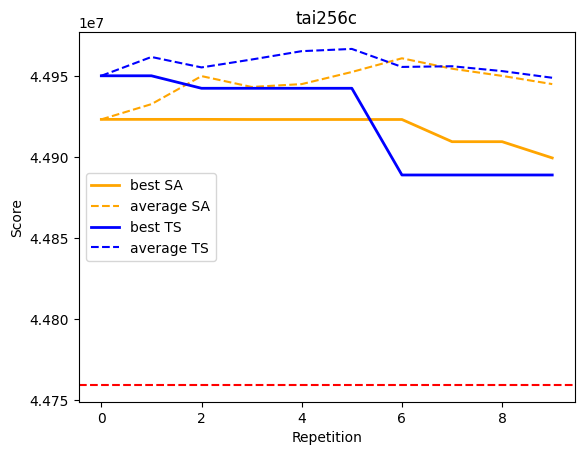

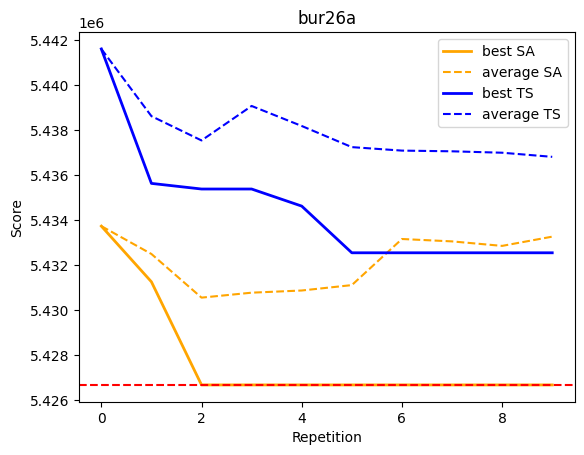

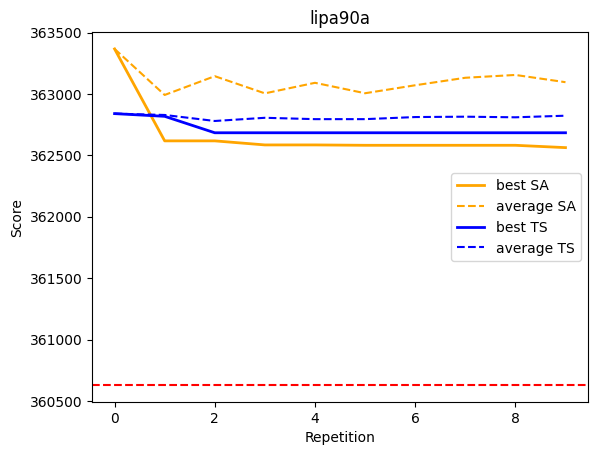

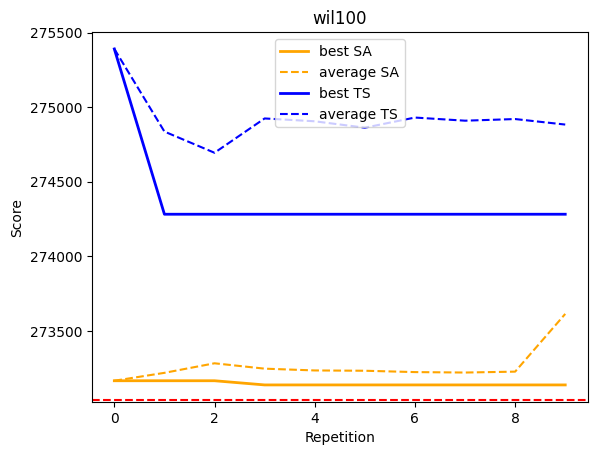

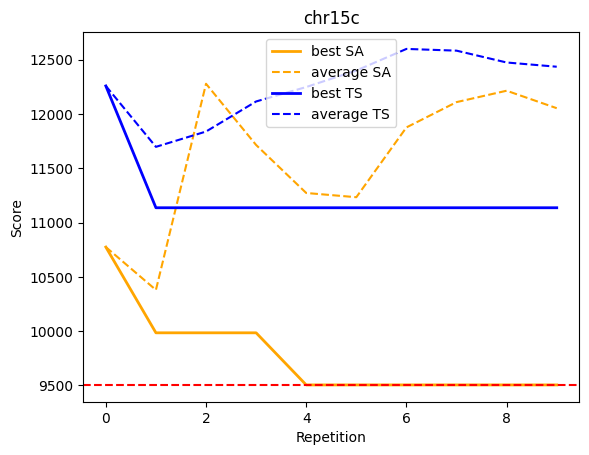

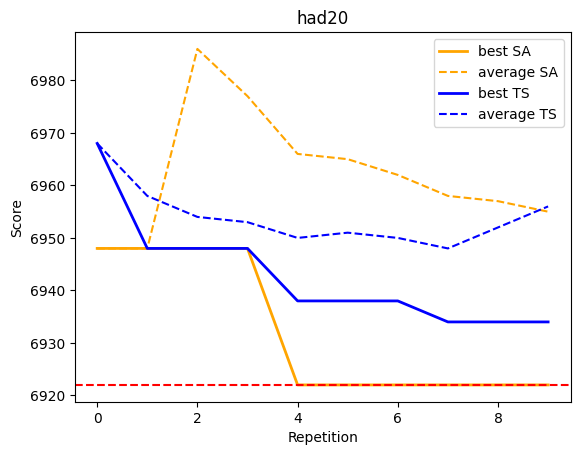

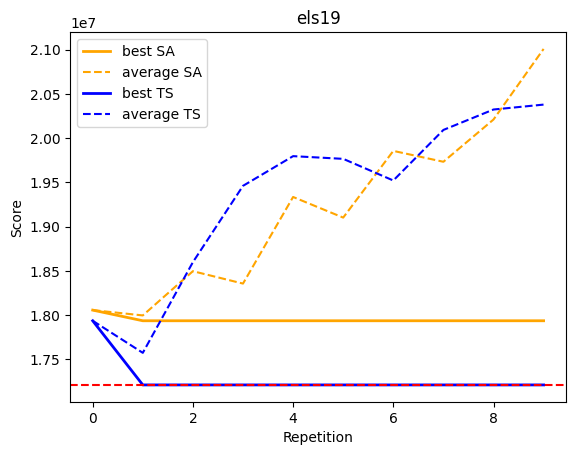

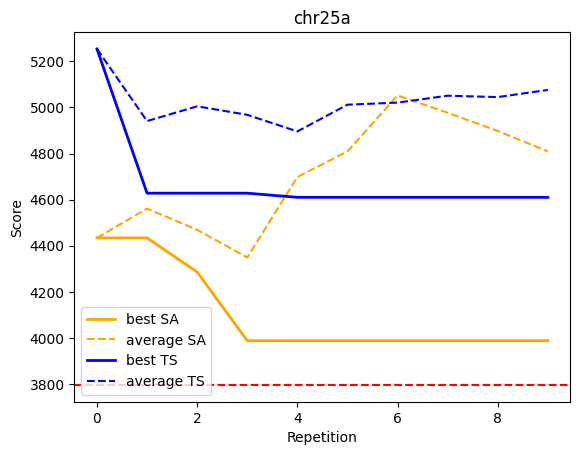

In [ ]:
for file in pathlib.Path("../results").glob("*sa.csv"):
	instance = file.name.split(".")[0][:-3]
	with open(f"../data/qaplib/{instance}.sln") as f:
		lines = f.readlines()
		best_score = float(lines[0].split()[1])
		best_sol = get_list(lines[1].strip())

	problem = file.name.split(".")[0][:-3]
	df = pd.read_csv(file)
	fig = plt.figure()
	ax = fig.add_subplot(111)
	ax.set_ylabel("Score")
	ax.set_xlabel("Repetition")
	sns.lineplot(
		np.minimum.accumulate(df["score"].values.tolist()),
		label="best SA",
		color="orange",
		linewidth=2,
	)
	sns.lineplot(
		cum_mean(df["score"].values),
		label="average SA",
		color="orange",
		linestyle="--",
	)
	file_ts = f"../results/{instance}_ts.csv"
	df_ts = pd.read_csv(file_ts)


	sns.lineplot(
		np.minimum.accumulate(df_ts["score"].values.tolist()),
		label="best TS",
		color="blue",
		linewidth=2,
	)
	sns.lineplot(
		cum_mean(df_ts["score"].values),
		label="average TS",
		color="blue",
		linestyle="--",
	)
	ax.axhline(y=best_score, color="r", linestyle="--", label="global optimum")

	plt.title(problem)
	plt.savefig(f"plots/{problem}_combined_scores.png")
	# plt.show()
	plt.close(fig)